In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV


In [4]:
data = pd.read_csv("/content/bank.csv",sep=';')

In [5]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


DATA PRE-PROCESSING

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

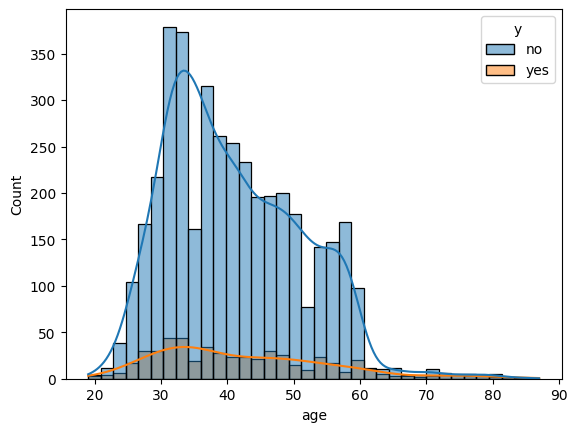

In [20]:
sns.histplot(x="age",data=data,kde=True,hue="y")
plt.show("Age Distribution")
plt.show()

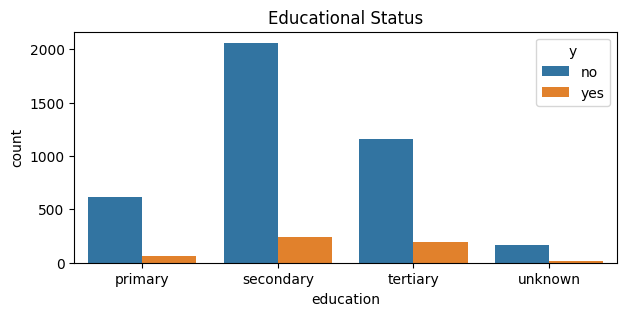

In [22]:
plt.figure(figsize=(7,3))
sns.countplot(x="education", data= data, hue ="y")
plt.title("Educational Status")
plt.show()

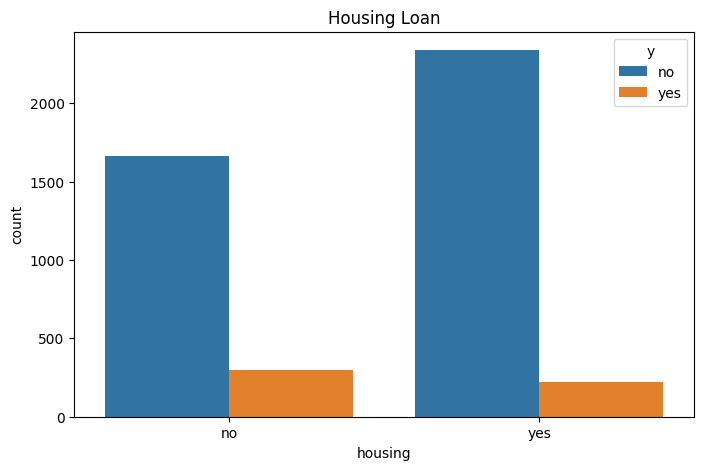

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x="housing",data=data,hue="y")
plt.title("Housing Loan")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

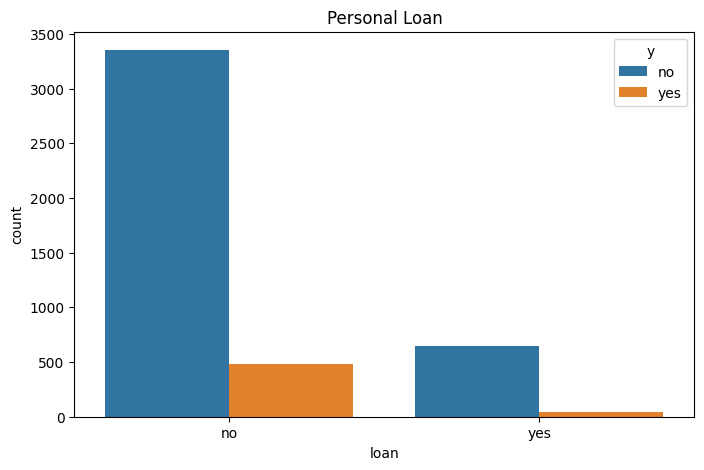

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x="loan",data=data,hue="y")
plt.title("Personal Loan")
plt.show

In [31]:
cols = data.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [33]:
le = LabelEncoder()

data[cols] = data[cols].apply(le.fit_transform)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


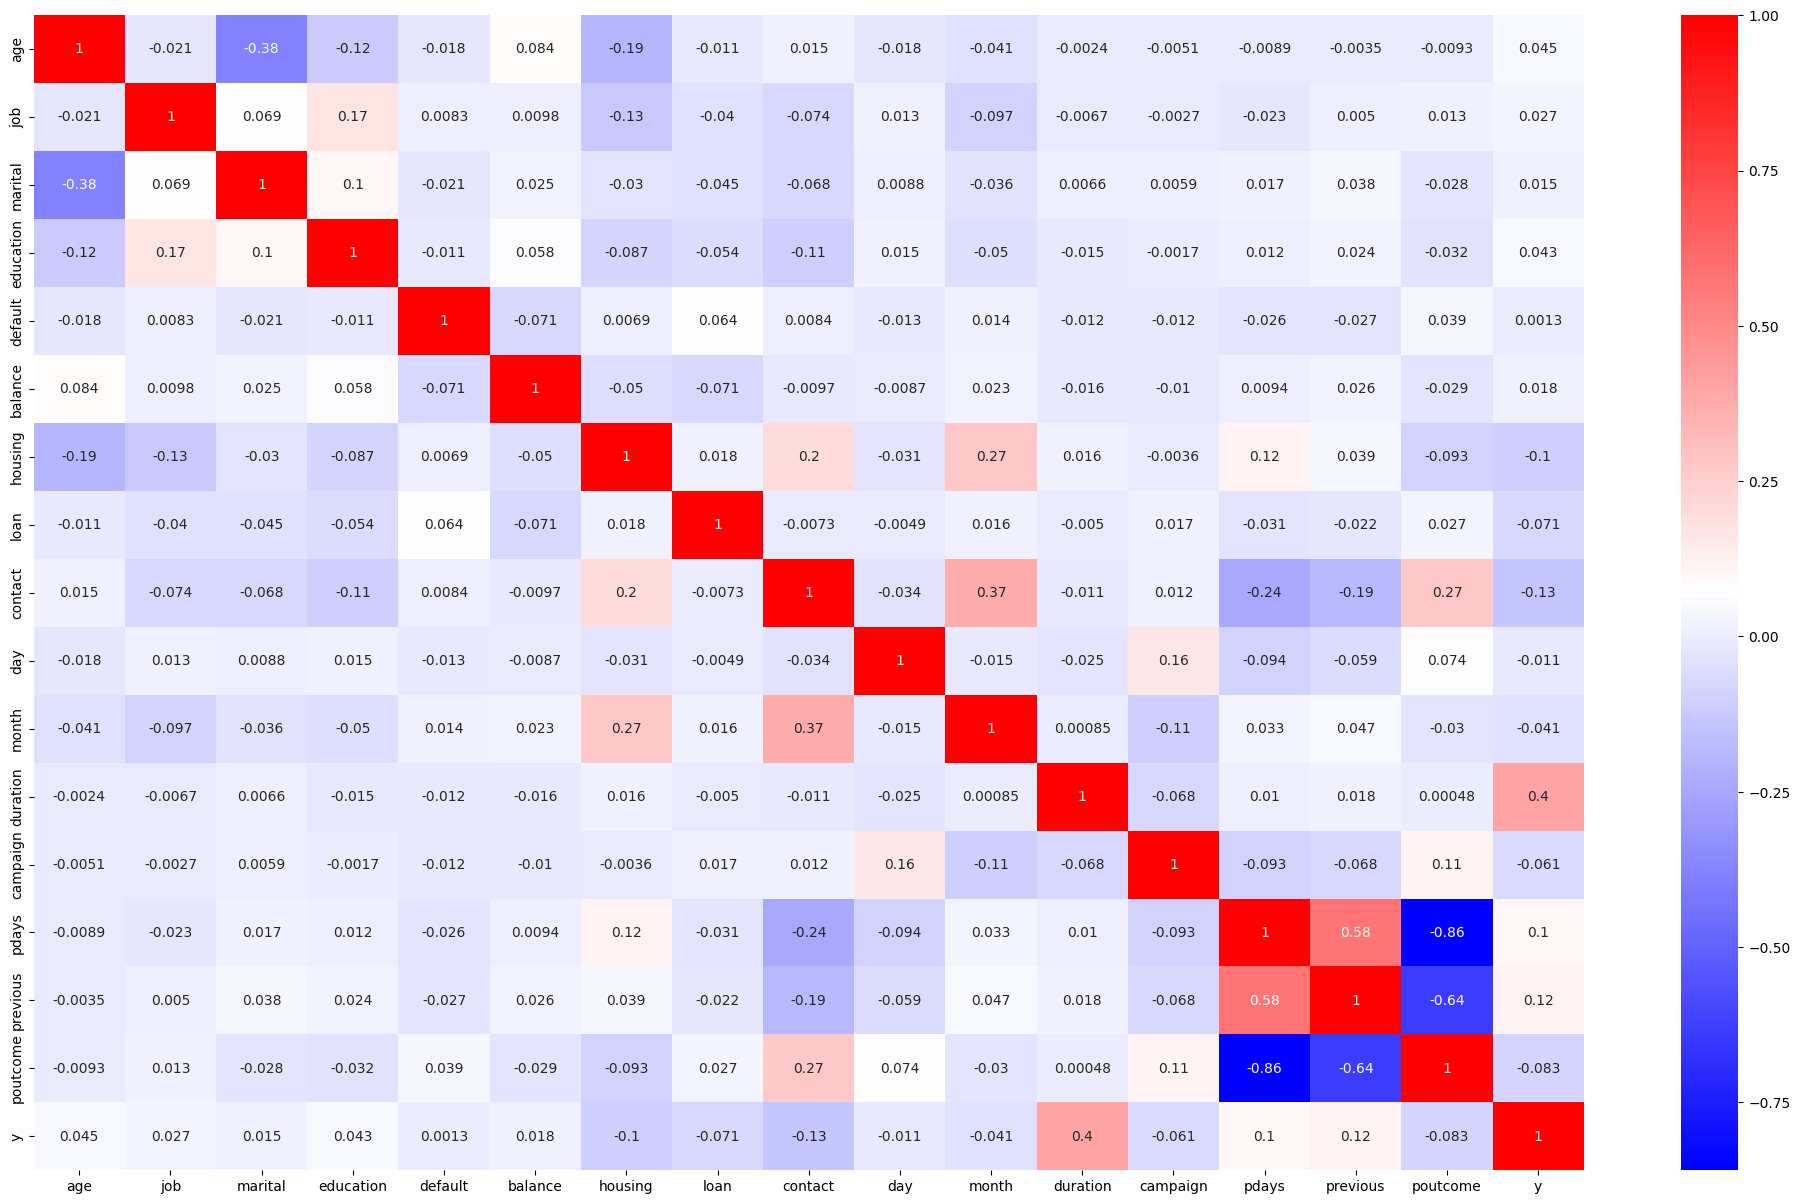

In [35]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), cmap='bwr', annot=True)
plt.show()

Standarsisation


In [36]:
#splitting Input and Output
X = data.drop("y",axis=1)
y = data["y"]

In [37]:

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [38]:
#train-test split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2)

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x,train_y)

DecisionTreeClassifier()

In [40]:
print("Training Accuracy :",decision_tree.score(train_x,train_y))
print("Testing Accuracy :",decision_tree.score(test_x,test_y))

Training Accuracy : 1.0
Testing Accuracy : 0.8607734806629834


In [41]:
yperd= decision_tree.predict(test_x)
print(confusion_matrix(test_y,yperd))
print(classification_report(test_y,yperd))

[[731  69]
 [ 57  48]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       800
           1       0.41      0.46      0.43       105

    accuracy                           0.86       905
   macro avg       0.67      0.69      0.68       905
weighted avg       0.87      0.86      0.86       905



In [43]:
# Applying Grid search cv to find best estimaters to improve model performance
p_grid = {
    'max_depth': [3,5,7,10,None],
    'criterion':['gini','entropy'],
    'min_samples_split':[2,3,5,7,10],
    'criterion':['gini','entropy']
}

In [44]:
gsv = GridSearchCV(decision_tree,p_grid,cv=5)
gsv.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 3, 5, 7, 10]})

In [47]:

gsv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=10)

In [48]:
gsv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10}

In [49]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2)
clf.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [50]:
pred_y = clf.predict(test_x)

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

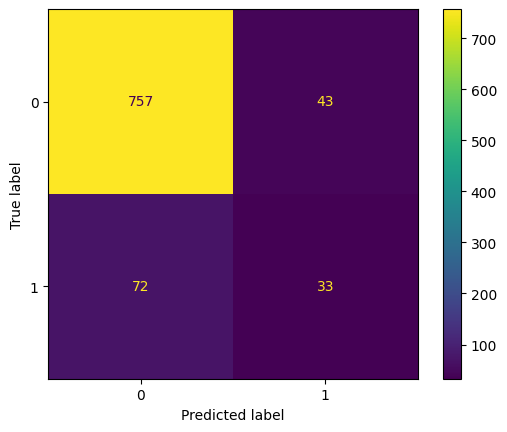

In [53]:
c= confusion_matrix(test_y,pred_y)
ConfusionMatrixDisplay(c,display_labels=clf.classes_).plot()
plt.show()

In [54]:
#Report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       800
           1       0.43      0.31      0.36       105

    accuracy                           0.87       905
   macro avg       0.67      0.63      0.65       905
weighted avg       0.86      0.87      0.86       905



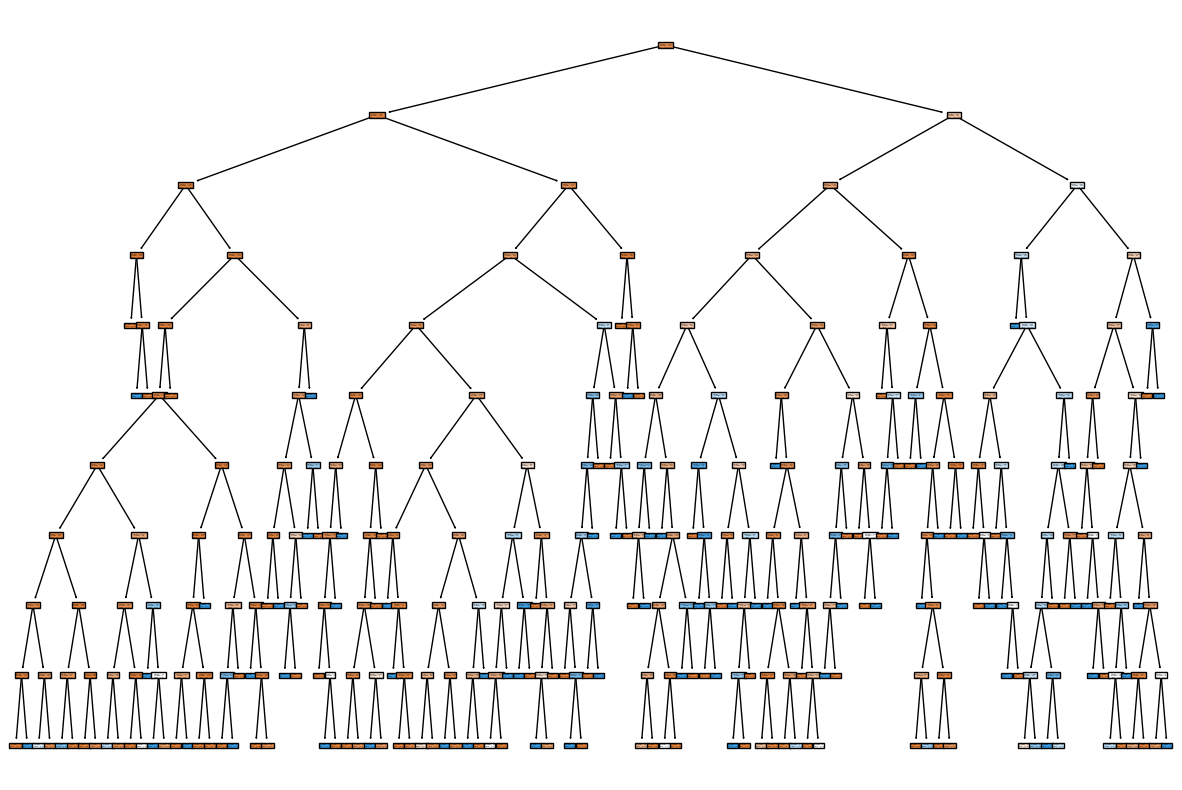

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf,filled=True,feature_names=X.columns)
plt.show()